In [350]:
import pandas as pd
import matplotlib.pyplot as plt

Tabell för Kaffeproduktion
- Först valde jag att se vilka kolumner som innehåller NaN värden för att avgöra ifall de ska inkluderas
- Därefter kontroll över hur tabellen ser ut vad det gäller rader och kolumner

In [351]:
df = pd.read_csv('../data/coffee-bean-production.csv')
df.isnull().sum()

Entity                                                          0
Code                                                         1940
Year                                                            0
Coffee, green | 00000656 || Production | 005510 || tonnes       0
dtype: int64

In [352]:
df.shape

(6850, 4)

In [353]:
df_mini = df.drop(columns=['Code'], axis=1)
df_mini.isnull().sum()

Entity                                                       0
Year                                                         0
Coffee, green | 00000656 || Production | 005510 || tonnes    0
dtype: int64

Efter kontrollerna valde jag att exkludera den kolumnen som innehåller noll-värden, och skapa en mini df-version,
då jag avgjorde att den kolumnen inte gör nytta för mina resultat

In [354]:
df_mini.head()

,Entity,Year,"Coffee, green | 00000656 || Production | 005510 || tonnes"
0,Africa,1961,870970
1,Africa,1962,883512
2,Africa,1963,996674
3,Africa,1964,1162048
4,Africa,1965,1075084


In [355]:
df_mini.rename(columns={'Coffee, green | 00000656 || Production | 005510 || tonnes': 'Production'}, inplace=True)

För att förenkla arbetet valde jag att döpa om en kolumn

In [356]:
df_mini.set_index("Year", inplace=True)
timeperiod = 2020
result = df_mini.loc[timeperiod]

Gjorde valet att "fixera" på kring kolumnen år, då jag har för avsikt att fokusera på ett år åt ggn, 
Skapade en variabel för att förenkla arbetet och bytet av årtal

In [357]:
result.shape

(112, 2)

Åter kontrollerar jag formen av datasettet,
och väljer att förutom att fokusera på år, men även fokusera på de länder/kontinenter som producerar över medelvärdet,
därmed skapade jag en enkel fomel för att kunna åstadkomma resultatet

In [358]:
prod = df_mini.Production.to_numpy()
prod = sum(prod)/len(prod)
result = df_mini[df_mini.Production > prod ]
result

,Entity,Production
Year,,
1961,Africa,870970
1962,Africa,883512
1963,Africa,996674
1964,Africa,1162048
1965,Africa,1075084
...,...,...
2016,World,9356902
2017,World,9313609
2018,World,10368369


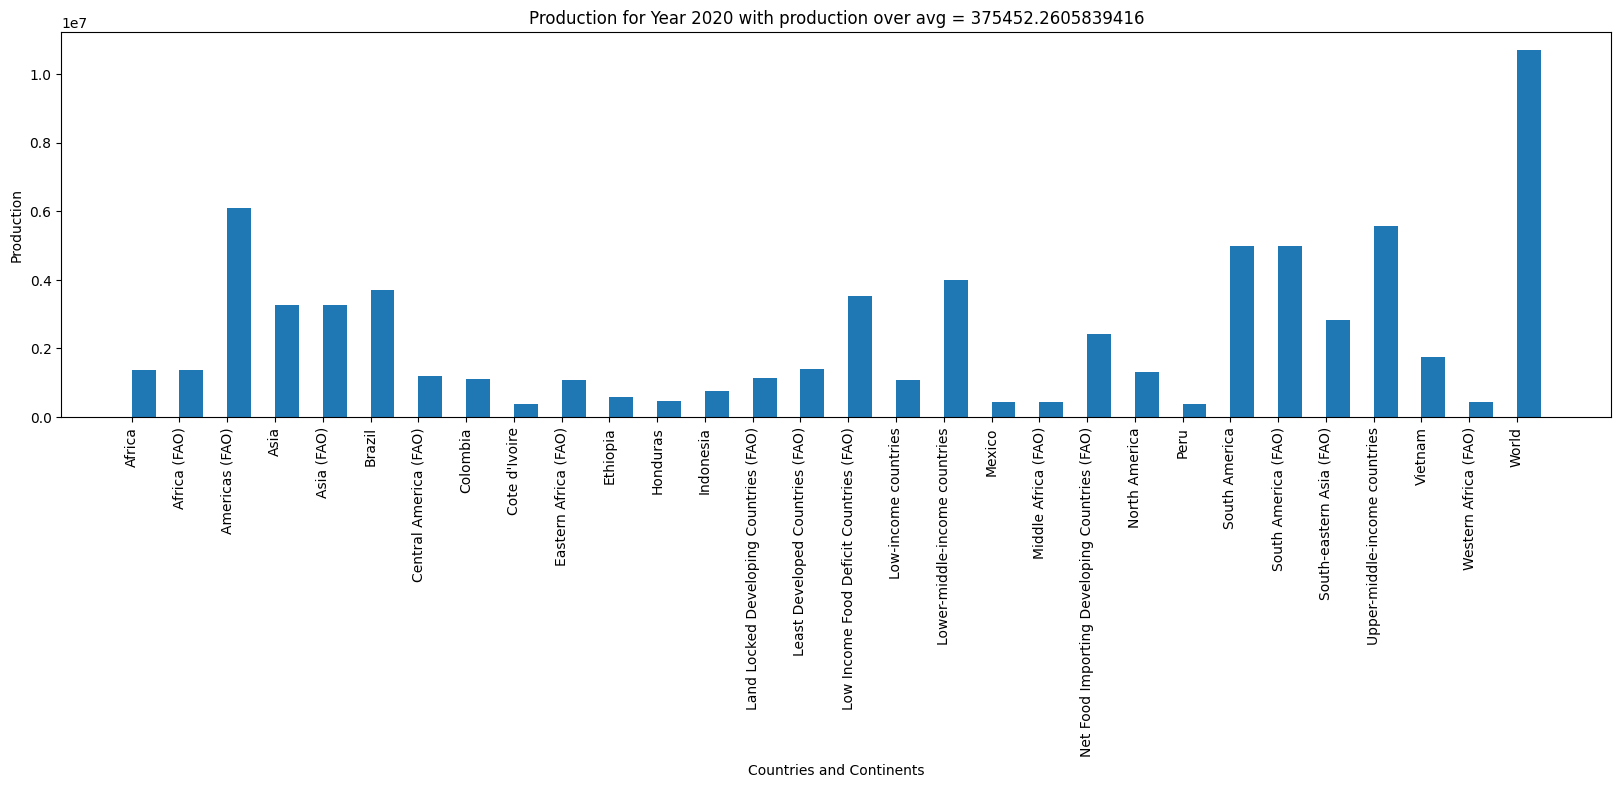

In [359]:
plt.figure(figsize=(20, 5))
plt.bar(result.Entity,result.Production, align='edge', width=0.5)
plt.title(f"Production for Year {timeperiod} with production over avg = {prod}")
plt.ylabel("Production")
plt.xticks(rotation=90)
plt.xlabel("Countries and Continents", labelpad=5)
plt.show()